In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [2]:
def get_db_url(database, username='', password='', hostname='', env=''):
    if env != '':
        d = {}
        file = open(env)
        for line in file:
            (key, value) = line.split('=')
            d[key] = value.replace('\n', '').replace("'",'').replace('"','')
        username = d['username']
        hostname = d['hostname']
        password = d['password']
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url

## Iris DB

1. Use the `iris` database to answer the following quesitons:

    - What does the distribution of petal lengths look like?
    - Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
    - Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
    - Which features would be best used to predict species?

In [3]:
# Use the iris database.
iris_url = get_db_url('iris_db', env='./env.py')
iris_statement = 'SELECT * FROM iris_db.measurements JOIN iris_db.species using(species_id);'
iris = pd.read_sql(iris_statement,iris_url)
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.measurement_id.nunique(), iris.shape

(150, (150, 7))

In [5]:
iris = iris.drop(columns=['species_id', 'measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


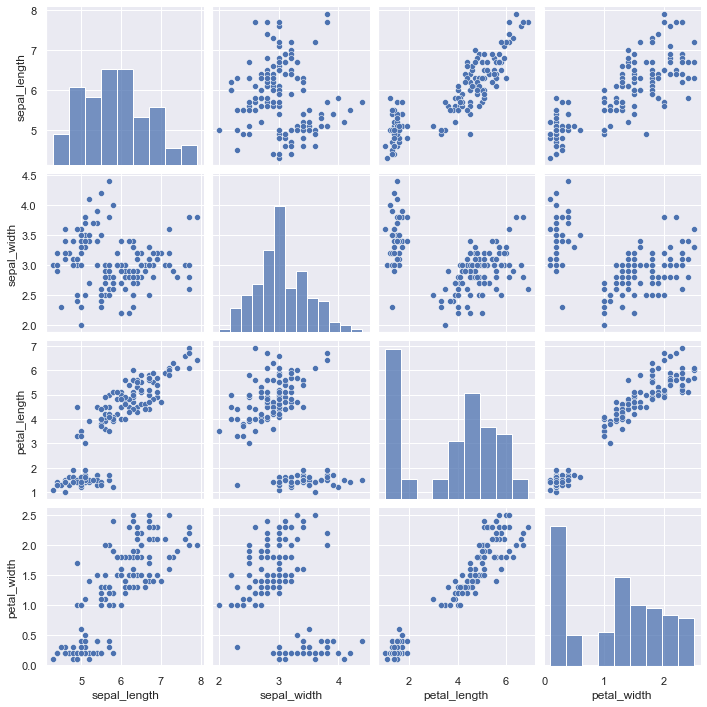

In [6]:
sns.set_theme() 
sns.pairplot(iris)

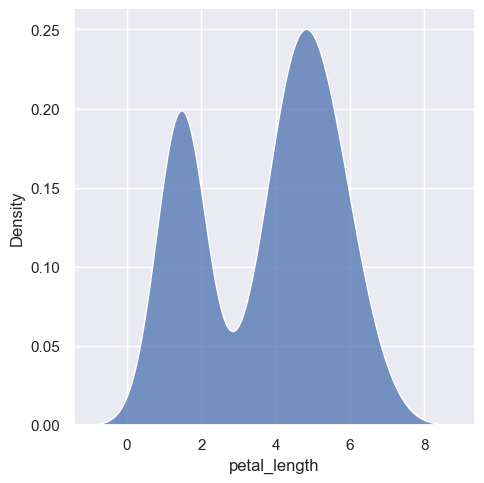

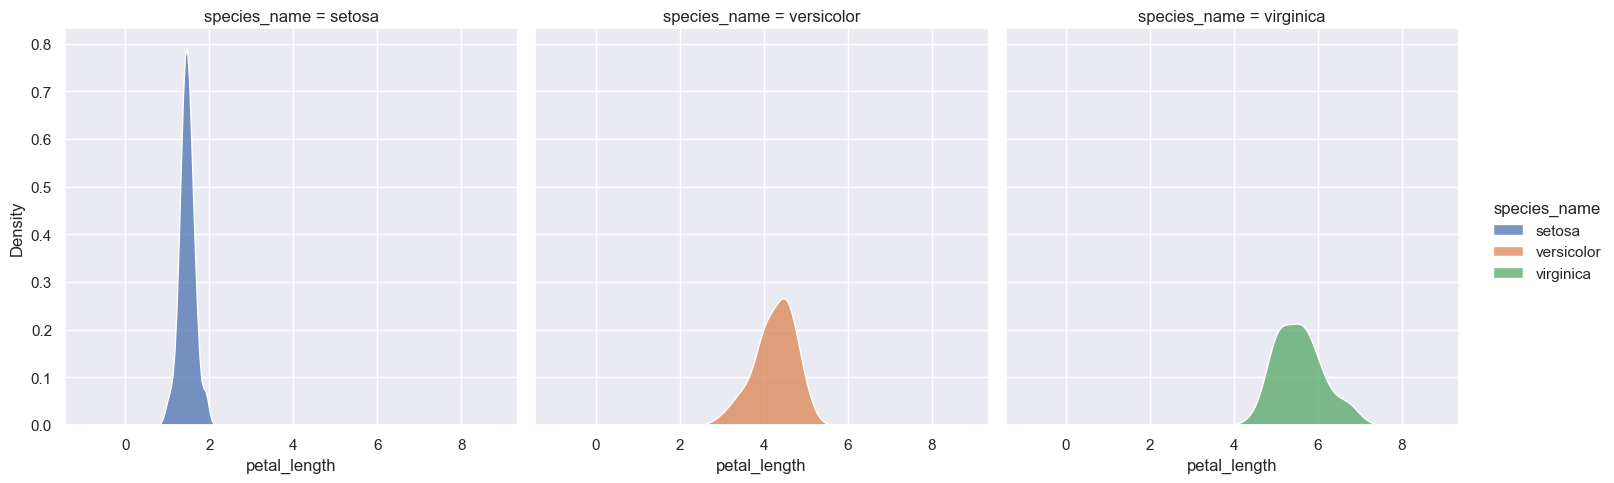

In [7]:
# - What does the distribution of petal lengths look like?
sns.displot(data=iris, x = 'petal_length', kind='kde', multiple='stack')
# sns.displot(data=iris, x = 'petal_length', kind='kde', hue='species_name', multiple='stack') # Hides some data for versicolor
sns.displot(data=iris, x = 'petal_length', kind='kde', hue='species_name', multiple='stack', col='species_name')


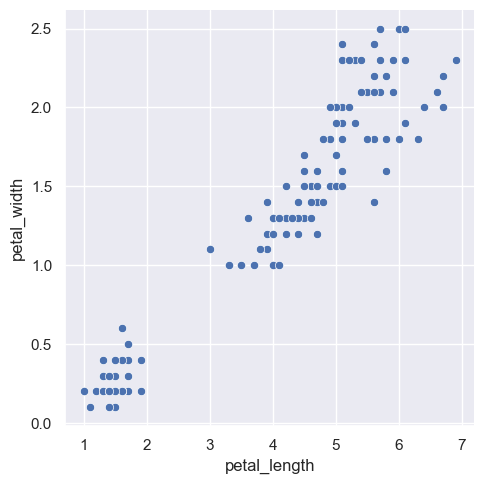

In [8]:
# - Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
iris.corr()
sns.relplot(data = iris, x= 'petal_length', y= 'petal_width')

## There is a strong corellation


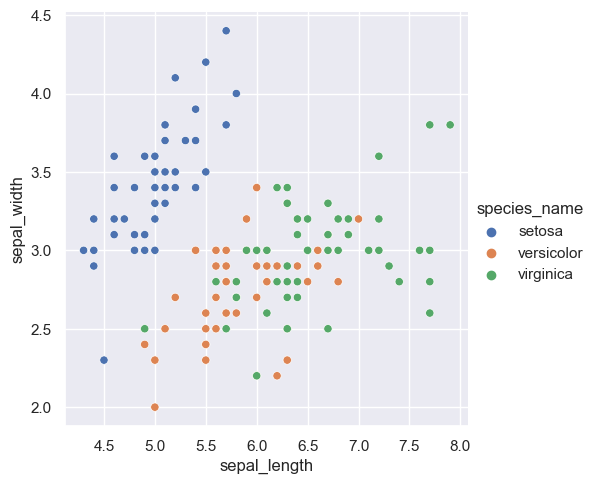

In [9]:
# - Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
sns.relplot(data = iris, x= 'sepal_length', y= 'sepal_width', hue='species_name')
## Based on this plot it would seem reasonable


In [10]:
iris['petal_mult'] = iris['petal_length'] * iris.petal_width
iris['sepal_mult'] = iris.sepal_length * iris.sepal_width

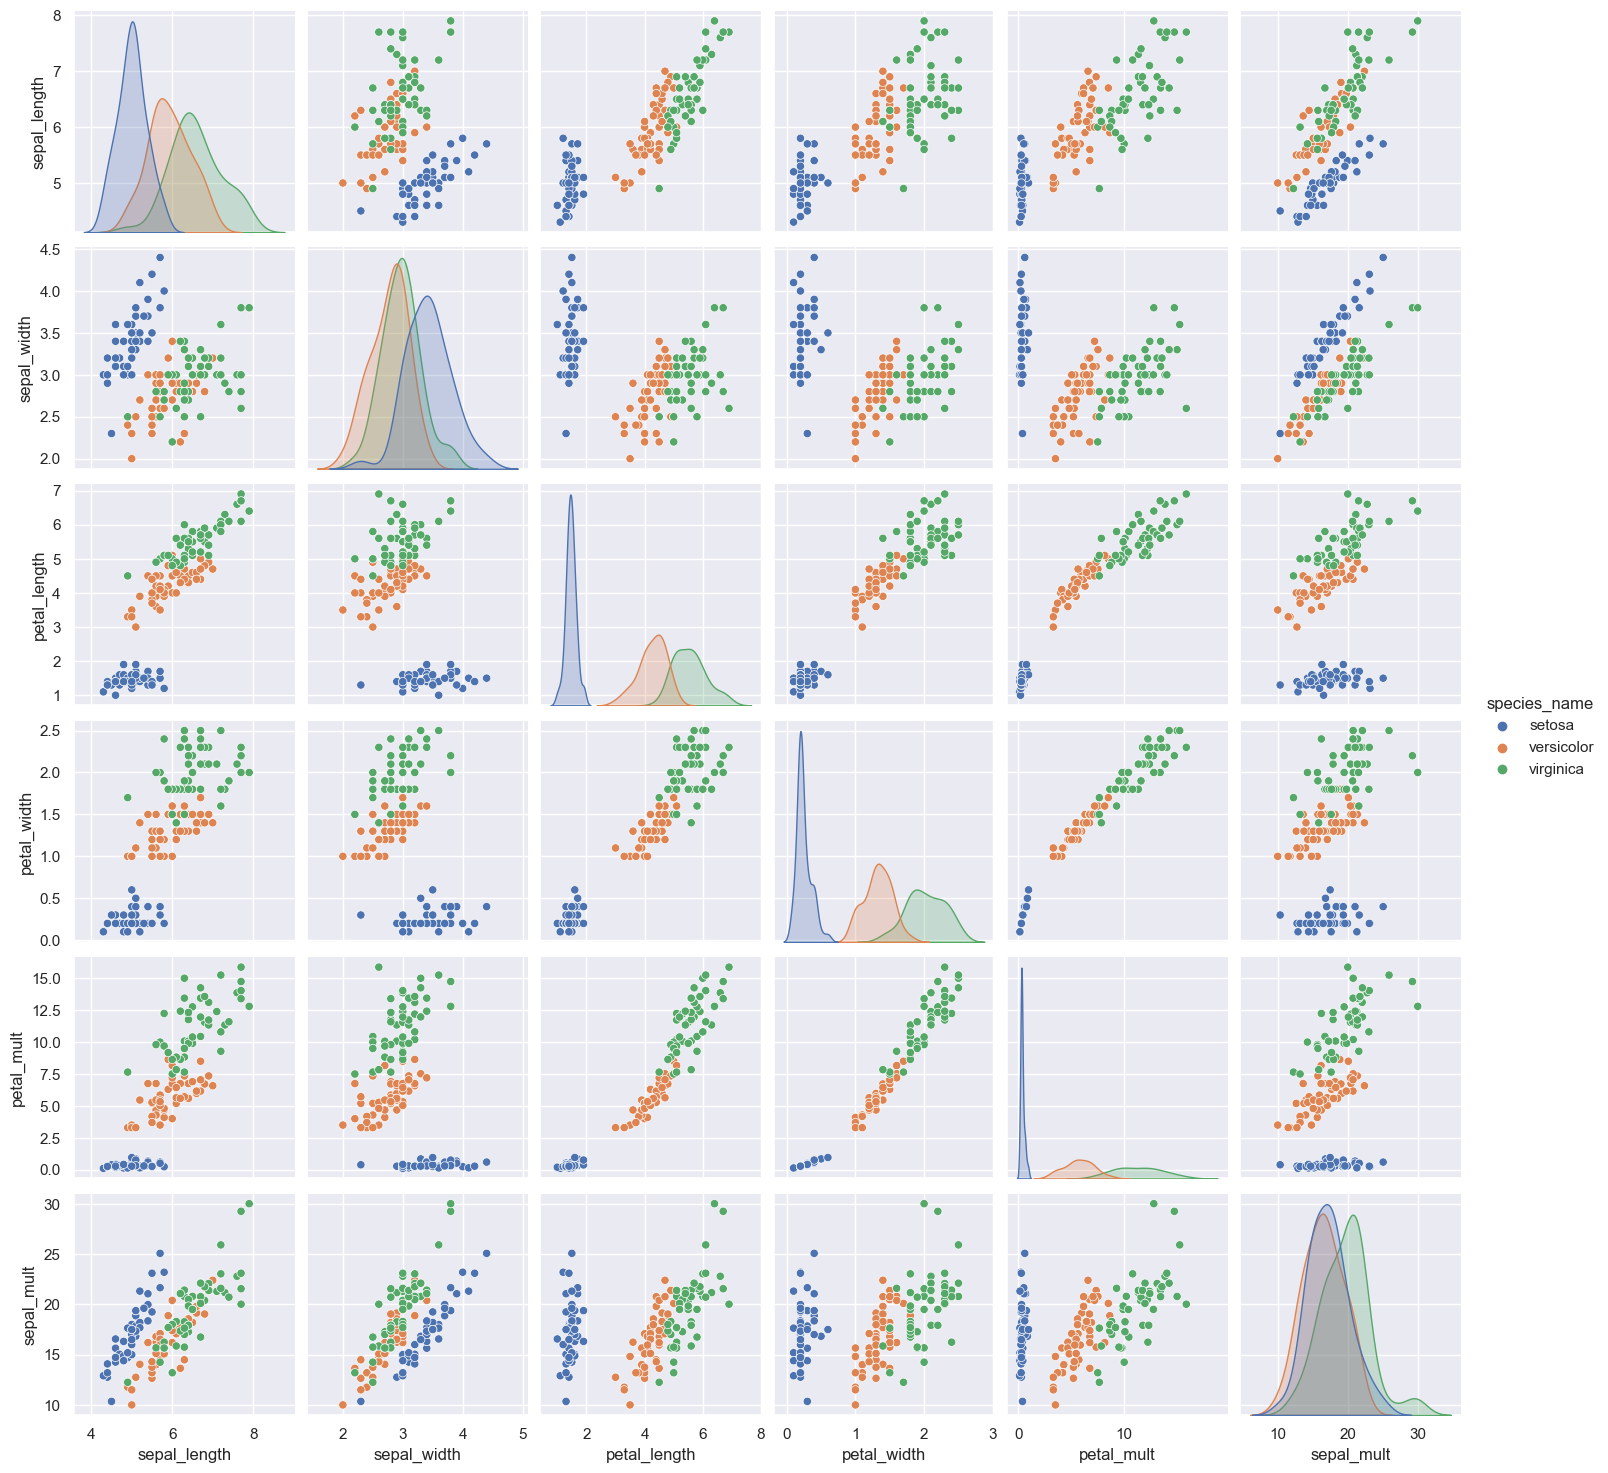

In [11]:
# - Which features would be best used to predict species?
sns.pairplot(iris, hue='species_name')

## A combination of petal width and length seems to have the clearest deliniator

## Part 2

Using the lesson as an example, use seaborn's `load_dataset` function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?


In [12]:
anscombe = sns.load_dataset('anscombe')
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB



Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


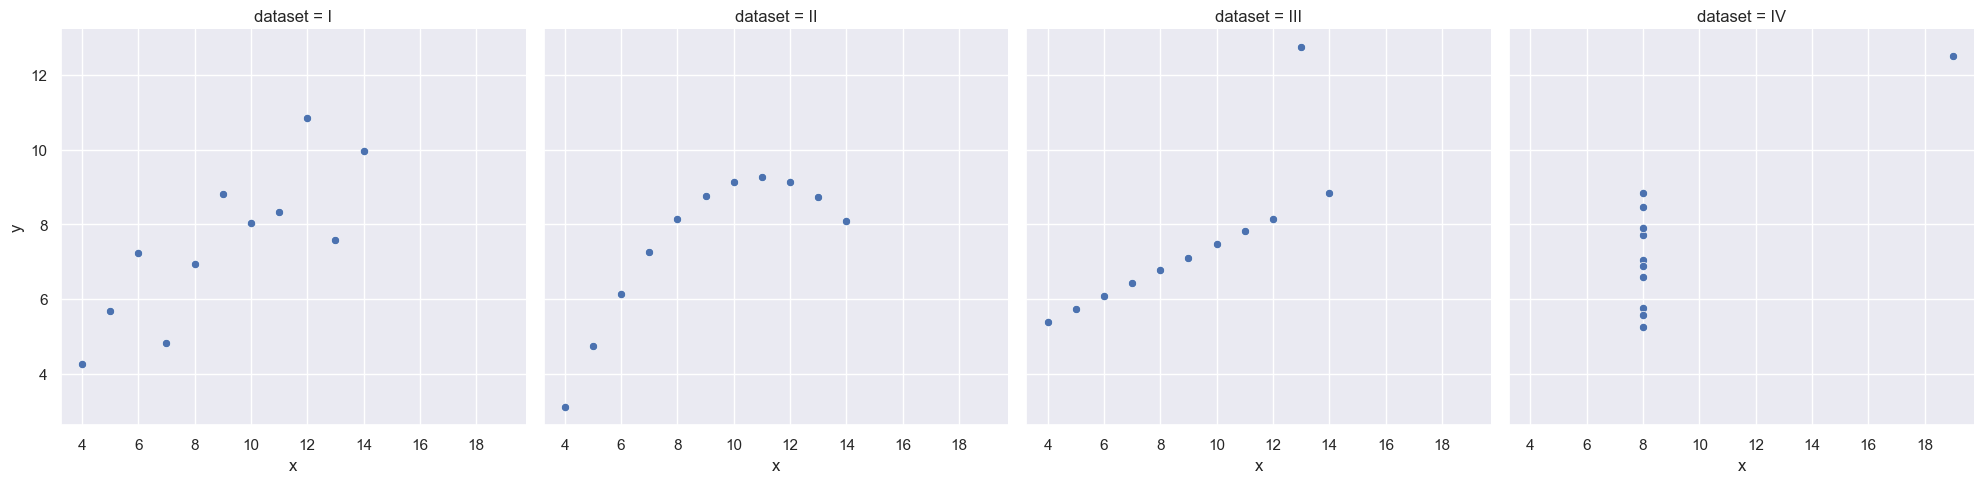

In [13]:
sns.relplot(data = anscombe, x= 'x', y= 'y', col='dataset')

Cautionary tale about outliers

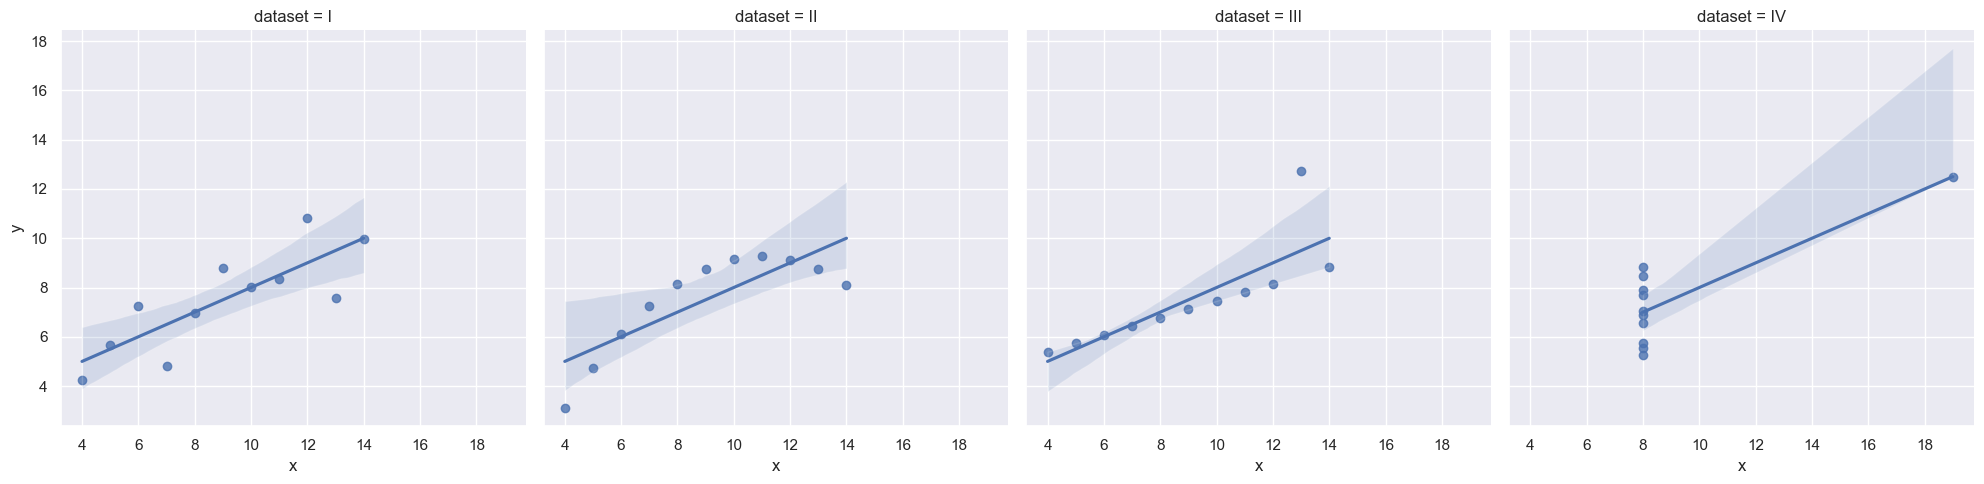

In [75]:
sns.lmplot(data = anscombe, x= 'x', y= 'y', col='dataset')


Load the `InsectSprays` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


In [14]:
import pydataset
pydataset.data('InsectSprays', True)
insect_sprays = pydataset.data('InsectSprays')

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [15]:
insect_sprays.info(), insect_sprays.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


(None,
    count spray
 1     10     A
 2      7     A
 3     20     A
 4     14     A
 5     14     A)

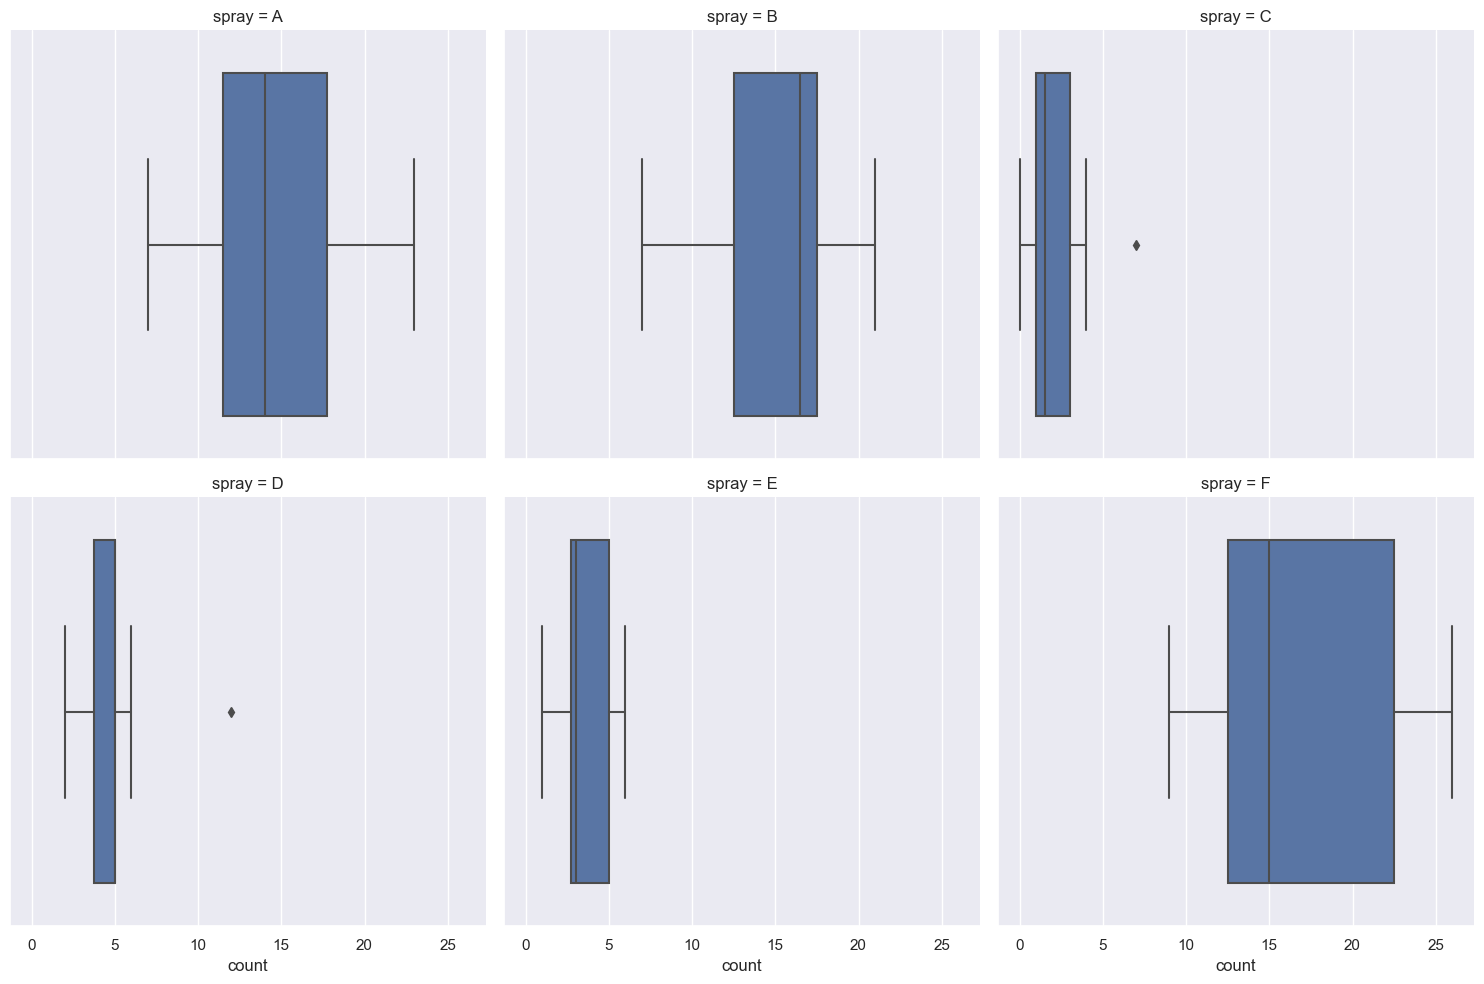

In [16]:
# This is too large
# sns.catplot(data= insect_sprays, x = 'count', col='spray', kind='box', col_wrap=3, hue='spray')

<AxesSubplot:xlabel='count', ylabel='spray'>

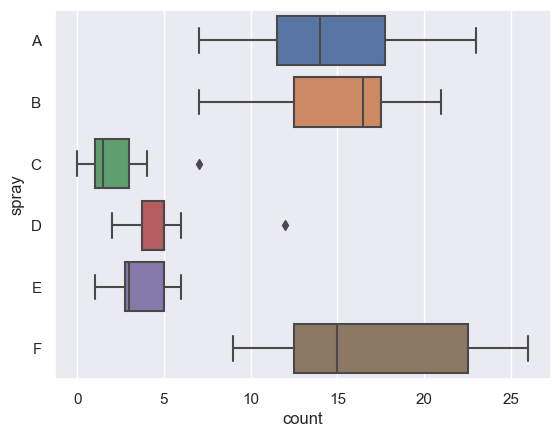

In [17]:
sns.boxplot(data= insect_sprays, x = 'count', y='spray')


Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:


In [18]:
pydataset.data('swiss', True)
swiss = pydataset.data('swiss')

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [19]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6



Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)  


In [20]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False



Does whether or not a province is Catholic influence fertility?  


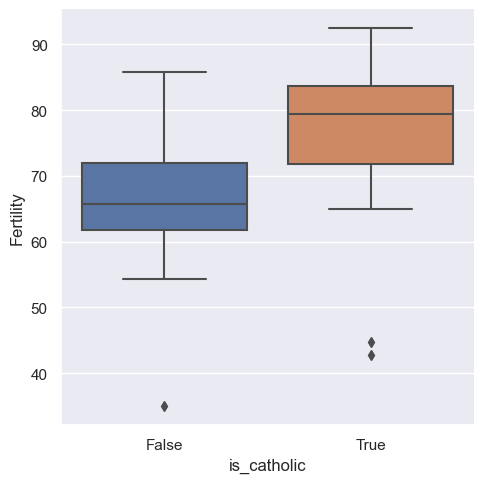

In [21]:
sns.catplot(data=swiss, y='Fertility', x='is_catholic', kind='box')

## I don't believe it... but yes?


What measure correlates most strongly with fertility?  


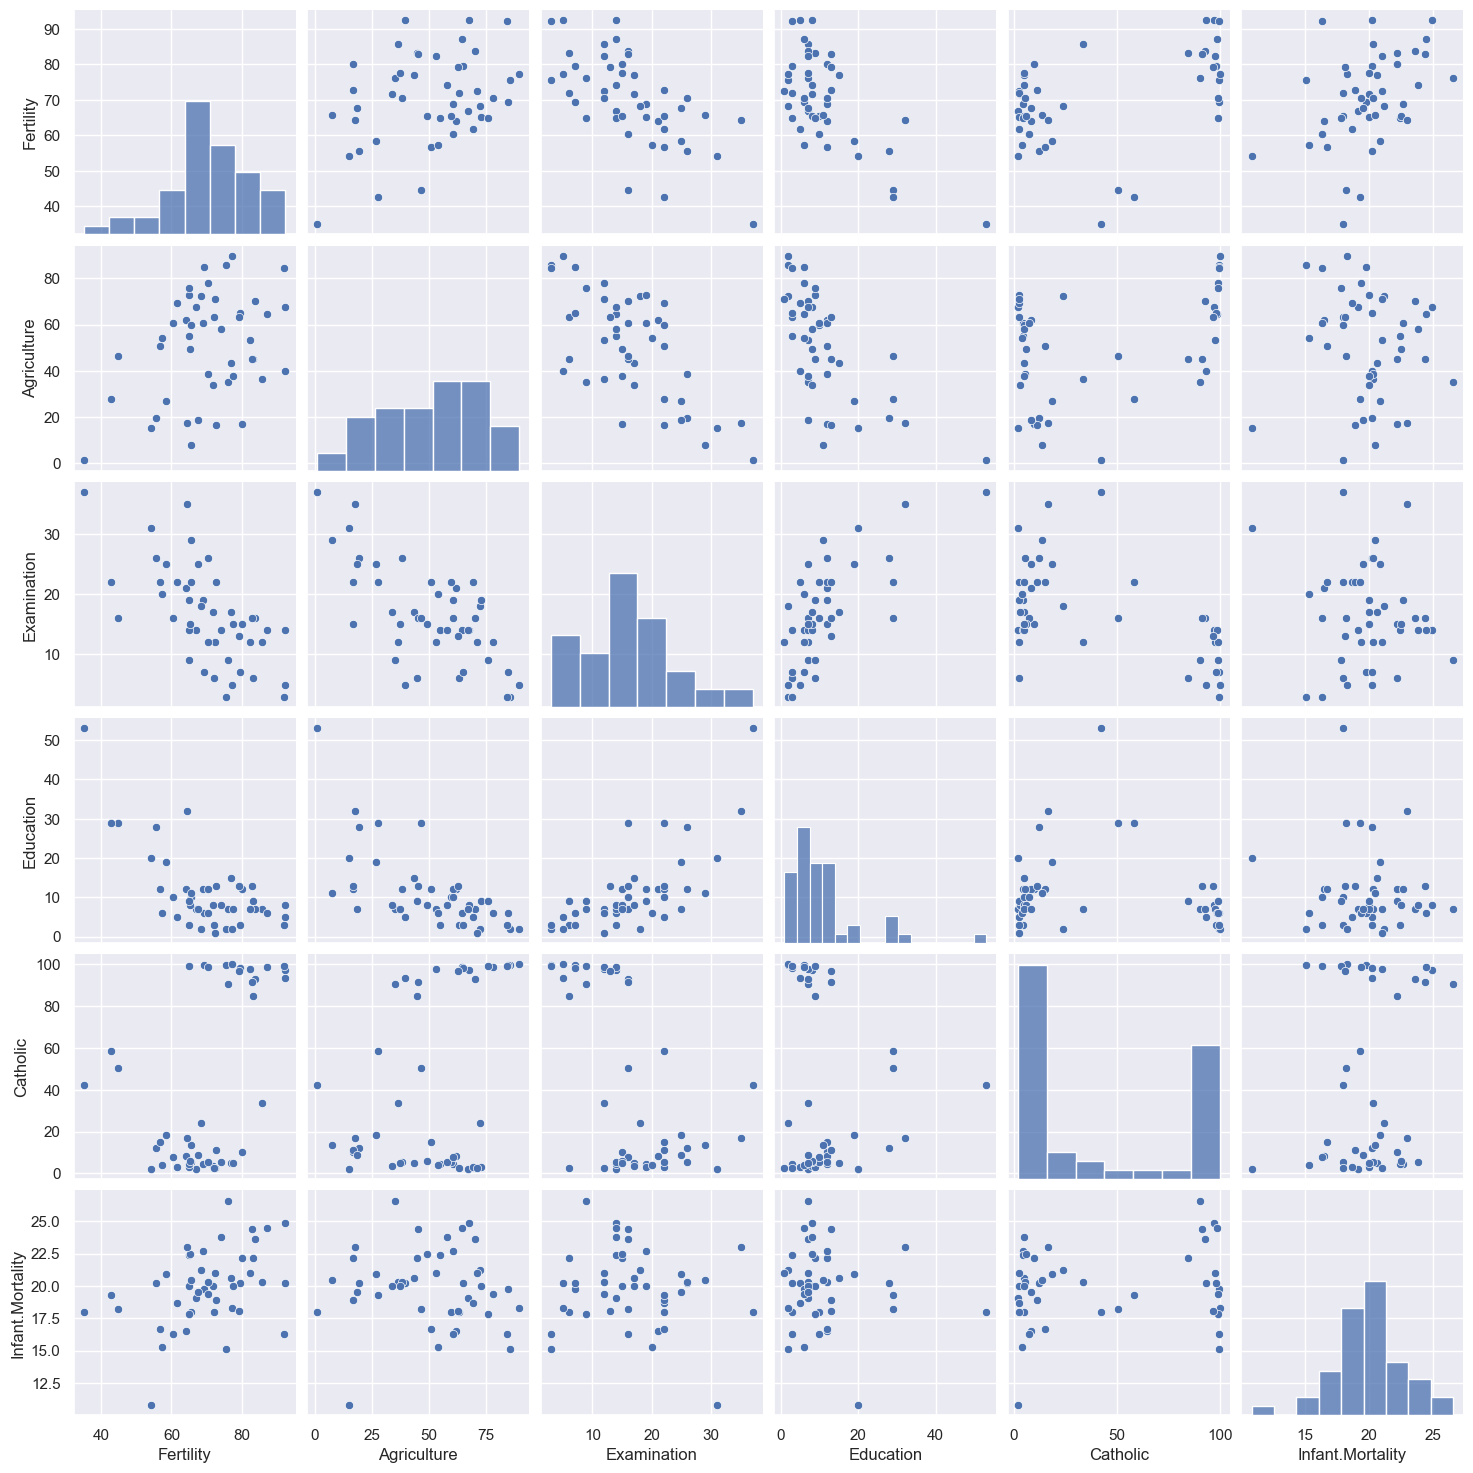

In [22]:
sns.pairplot(swiss.drop(columns='is_catholic'))


In [23]:
swiss.corr()
## Examination and Education correlate most strongly with fertility.

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000



Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [24]:
url = get_db_url('chipotle',env='./env.py')
statement='select * from orders'
chipotle = pd.read_sql(statement,url)

def unstring_usd(str):
    return float(str.replace('$','').replace(',',''))
chipotle['item_price'] = chipotle['item_price'].apply(unstring_usd)

chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [25]:
# The four most popular items
largest4 = chipotle.groupby('item_name')['quantity'].sum().nlargest(4)
largest4


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [34]:
top_4_revenue = chipotle.merge(largest4, how='right', on='item_name').groupby('item_name')[['item_price']].agg('sum').reset_index()
top_4_revenue.head()


,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


In [38]:
top_4_revenue.info()
type(top_4_revenue)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_name   4 non-null      object 
 1   item_price  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='item_name', ylabel='item_price'>

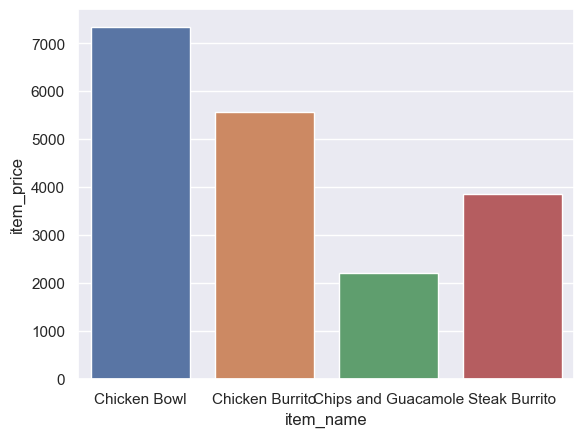

In [33]:
sns.barplot(x=top_4_revenue.item_name, y=top_4_revenue.item_price)


<AxesSubplot:xlabel='item_price', ylabel='item_name'>

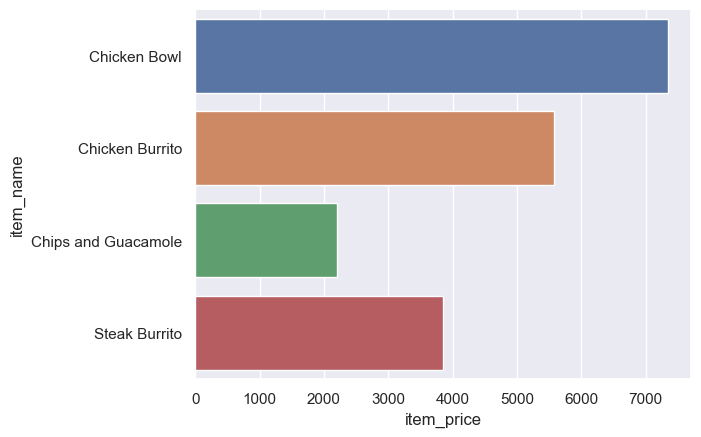

In [47]:
sns.barplot(data=top_4_revenue,x='item_price',  y='item_name')



Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [49]:
pydataset.data('sleepstudy', True)
sleepstudy = pydataset.data('sleepstudy')


sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [50]:
sleepstudy.to_csv('temp.csv')

In [51]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [57]:
sleepstudy.groupby('Subject')['Reaction'].agg('mean')

Subject
308    342.13383
309    215.23298
310    231.00127
330    303.22142
331    309.43605
332    307.30207
333    316.15831
334    295.30205
335    250.07004
337    375.72101
349    275.83447
350    313.60268
351    290.09775
352    337.42154
369    306.03464
370    291.70177
371    294.98404
372    317.88613
Name: Reaction, dtype: float64

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

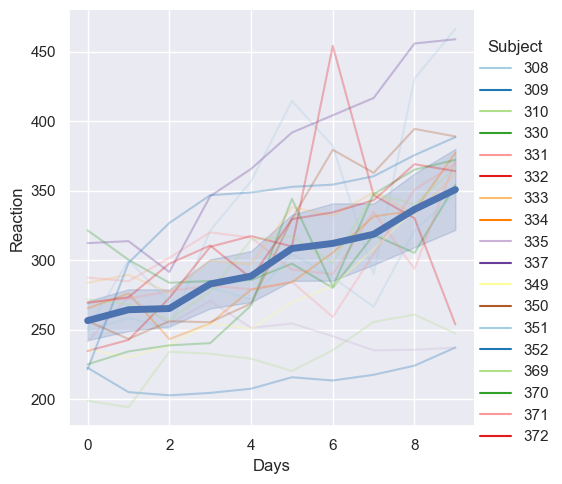

In [74]:
sns.relplot(data=sleepstudy, kind='line', y='Reaction', x='Days', hue='Subject', palette='Paired', alpha=.3)
sns.lineplot(data=sleepstudy, y='Reaction', x='Days', linewidth=5, legend=False)